<a href="https://colab.research.google.com/github/shareefat/machine-learning-/blob/main/HR_comma_sep_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Tech/ML/Datasets/HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.shape

(14999, 10)

In [ ]:
data['salary'].value_counts()

,count
salary,
low,7316
medium,6446
high,1237


In [ ]:
data.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
data['Department'].value_counts()

,count
Department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


<Axes: xlabel='count', ylabel='Department'>

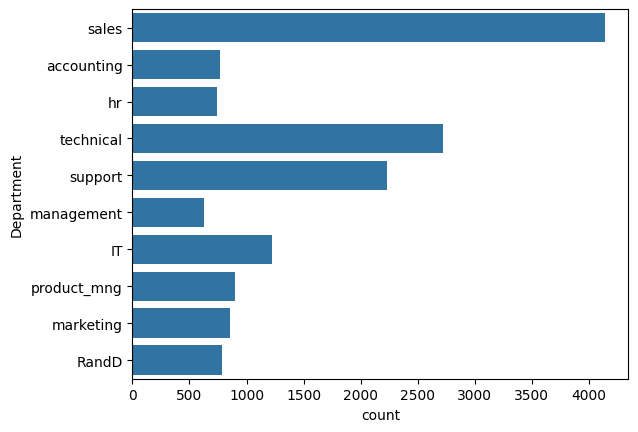

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data['Department'])

In [ ]:
data=pd.get_dummies(data,columns=['Department'],drop_first=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,True,False,False


In [ ]:
data['salary'].replace({'low':0,'medium':1,'high':2},inplace=True)
data.head()

<ipython-input-97-e5cc0ba7eed6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['salary'].replace({'low':0,'medium':1,'high':2},inplace=True)
<ipython-input-97-e5cc0ba7eed6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['salary'].replace({'low':0,'medium':1,'high':2},inplace=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [ ]:
y=data['salary']
x=data.drop(['salary'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=324)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
y_test[:5]

,salary
592,0
8461,1
2207,1
2213,1
8928,2


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[1129,  308,   17],
       [ 929,  342,   30],
       [ 134,   66,   45]])

<Axes: >

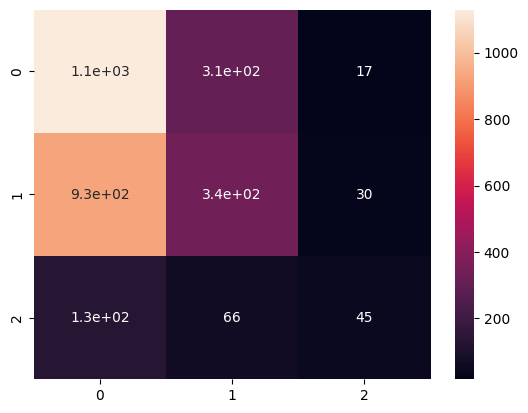

In [ ]:
import seaborn as sns
# ax= plt.subplot()
sns.heatmap(cm,annot=True)#,ax=ax

# labels=['low','medium','high']
# ax.set_xticklabels(labels)
# ax.set_yticklabels(labels)

# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# ax.set_title('Confusion Matrix')

In [ ]:
accuracy_score(y_test,y_pred)

0.5053333333333333